**Import libraries**

In [49]:
import pandas as pd
import numpy as np
import matplotlib . pyplot as plt
from sklearn . model_selection import train_test_split
from sklearn . preprocessing import StandardScaler

**Đọc dữ liệu**

In [50]:
dataset_path = 'titanic_modified_dataset.csv'
df = pd.read_csv(dataset_path, index_col='PassengerId')

**Chia biến X**

In [51]:
dataset_arr = df.to_numpy().astype(np.float64)
X , y = dataset_arr[:, :-1], dataset_arr[:, -1]

**Thêm bias vào X**

In [82]:
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)

**Chia tập train, val, test**

In [53]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train , X_val , y_train , y_val = train_test_split(
X_b , y,
test_size = val_size ,
random_state = random_state ,
shuffle = is_shuffle
)

X_train , X_test , y_train , y_test = train_test_split(
X_train , y_train ,
test_size = test_size ,
random_state = random_state ,
shuffle = is_shuffle)

**Chuẩn hóa dữ liệu**

In [54]:
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform (X_val[:, 1:])
X_test[:, 1:] = normalizer.transform (X_test[:, 1:])

**Cài đặt các hàm quan trọng**

**Hàm sigmoid**

In [55]:
def sigmoid(z):
    return 1/ (1 + np.exp(-z))

**Hàm dự đoán**

In [56]:
def predict(X, theta):
    dot_product = np.dot(X, theta)
    y_hat = sigmoid(dot_product)
    return y_hat

**Hàm tính loss**

In [57]:
def compute_loss (y_hat , y):
    y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7)

    return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()

H**àm tính gradiaent**

In [58]:
def compute_gradient(X, y, y_hat):
    return np.dot(X.T, (y_hat - y))/y.size

**Cập nhật trọng số**

In [59]:
def update_theta(theta , gradient , lr):
     return theta - lr * gradient

**Hàm tính độ chính xác**

In [60]:
def compute_accuracy(X, y, theta ):
    y_hat = predict(X, theta ).round ()
    acc = (y_hat == y).mean ()

    return acc

**Khai báo các siêu tham số và khởi tạo weights**

In [79]:
lr = 0.01
epochs = 100
batch_size = 64

np.random.seed(random_state )
theta = np.random.uniform(size = X_train.shape[1])

**Huấn luyện mô hình**

In [80]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i + batch_size]
        y_i = y_train[i:i + batch_size]

        y_hat = predict(X_i, theta)

        train_loss = compute_loss(y_hat, y_i)

        gradient = compute_gradient(X_i, y_i, y_hat)

        theta = update_theta(theta, gradient, lr)

        train_batch_losses.append(train_loss)

    train_acc = compute_accuracy(X_train, y_train, theta)
    train_batch_accs.append(train_acc)

    y_val_hat = predict(X_val, theta)
    val_loss = compute_loss(y_val_hat, y_val)
    val_batch_losses.append(val_loss)

    val_acc = compute_accuracy(X_val, y_val, theta)
    val_batch_accs.append(val_acc)

    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    print(f'\nEPOCH {epoch + 1}:\tTraining loss: {train_batch_loss:.3f}\tValidation loss: {val_batch_loss:.3f}')


EPOCH 1:	Training loss: 0.723	Validation loss: 0.604

EPOCH 2:	Training loss: 0.713	Validation loss: 0.599

EPOCH 3:	Training loss: 0.704	Validation loss: 0.594

EPOCH 4:	Training loss: 0.695	Validation loss: 0.589

EPOCH 5:	Training loss: 0.686	Validation loss: 0.585

EPOCH 6:	Training loss: 0.677	Validation loss: 0.581

EPOCH 7:	Training loss: 0.669	Validation loss: 0.577

EPOCH 8:	Training loss: 0.661	Validation loss: 0.573

EPOCH 9:	Training loss: 0.654	Validation loss: 0.569

EPOCH 10:	Training loss: 0.646	Validation loss: 0.566

EPOCH 11:	Training loss: 0.639	Validation loss: 0.562

EPOCH 12:	Training loss: 0.632	Validation loss: 0.559

EPOCH 13:	Training loss: 0.625	Validation loss: 0.556

EPOCH 14:	Training loss: 0.619	Validation loss: 0.553

EPOCH 15:	Training loss: 0.612	Validation loss: 0.550

EPOCH 16:	Training loss: 0.606	Validation loss: 0.547

EPOCH 17:	Training loss: 0.600	Validation loss: 0.545

EPOCH 18:	Training loss: 0.594	Validation loss: 0.542

EPOCH 19:	Training

Visualize

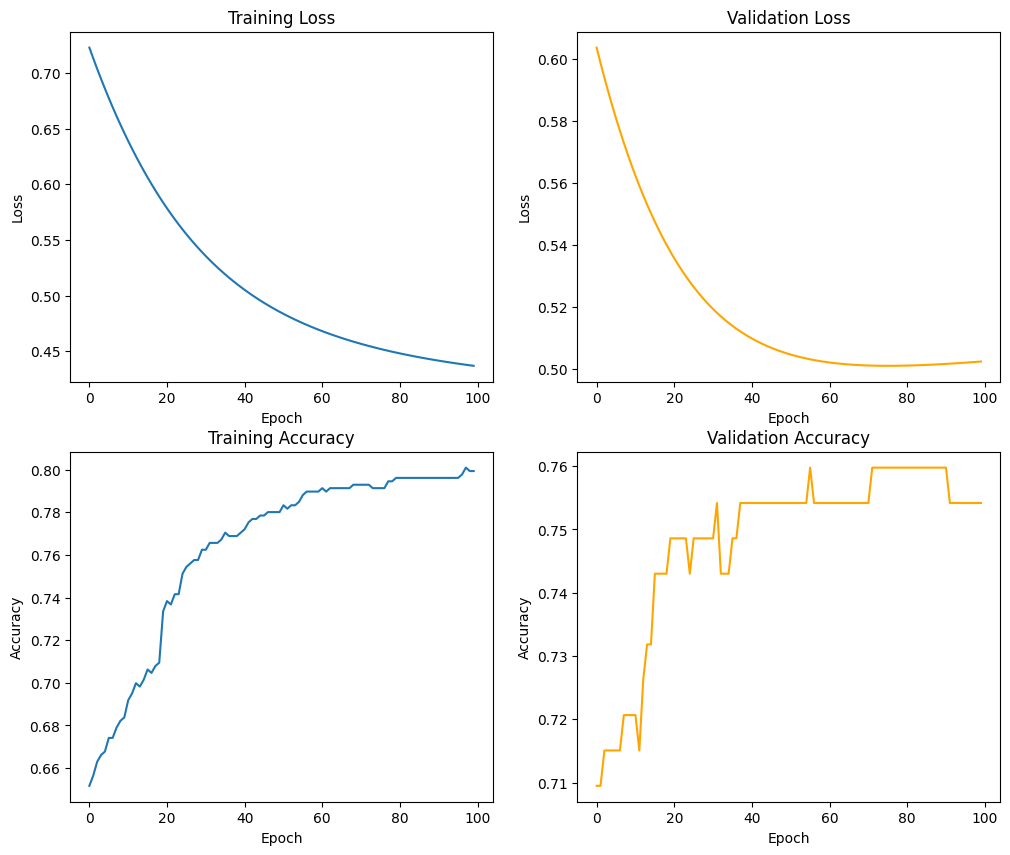

In [81]:

fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()


**Đánh giá mô hình**

In [84]:
val_set_acc = compute_accuracy (X_val , y_val , theta )
test_set_acc = compute_accuracy (X_test , y_test , theta )
print ('Evaluation on validation and test set :')
print (f'Accuracy : { val_set_acc }')
print (f'Accuracy : { test_set_acc }')

Evaluation on validation and test set :
Accuracy : 0.7541899441340782
Accuracy : 0.7528089887640449
